<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/Document_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_local #progowanie
from numpy.linalg import norm #norma euklidesowa
import numpy as np
import imutils
import cv2
cv2.__version__

'4.6.0'

In [3]:
image = cv2.imread('paragon_1.jpg')
image.shape

(600, 450, 3)

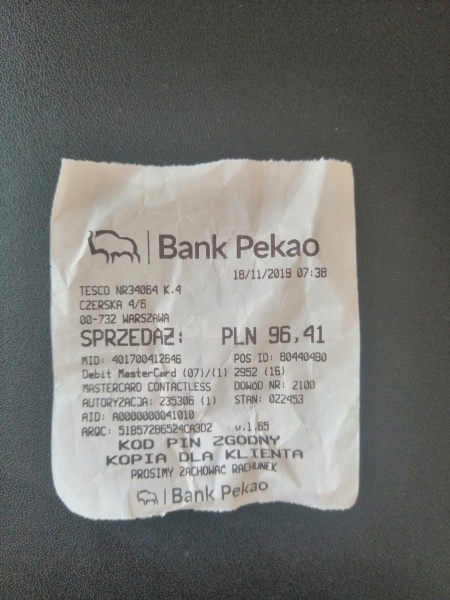

In [4]:
cv2_imshow(image)

In [10]:
image.shape

(600, 450, 3)

In [11]:
orginal_image = image.copy() #zachowuje kopie
ratio = image.shape[0] /500.0#zachowuje proporcje orginalnego obrazu

In [12]:
ratio

1.2

In [13]:
image = imutils.resize(image, height=500)
image.shape

(500, 375, 3)

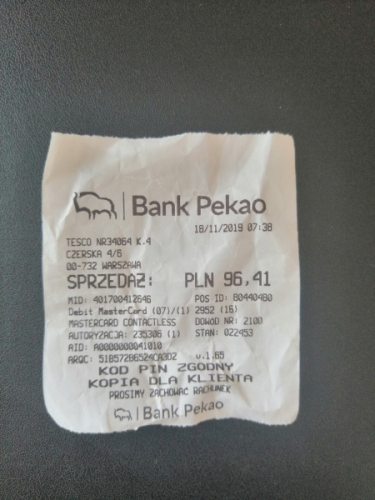

In [14]:
cv2_imshow(image)

In [19]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#konwersja na szary

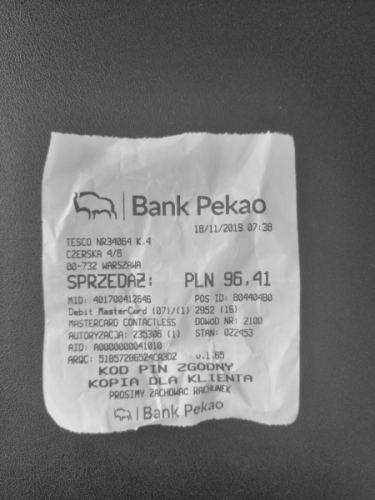

In [18]:
cv2_imshow(gray_image)

Detekcja krawędzi

In [21]:
edges = cv2.Canny(gray_image,threshold1 = 75,threshold2 = 200)

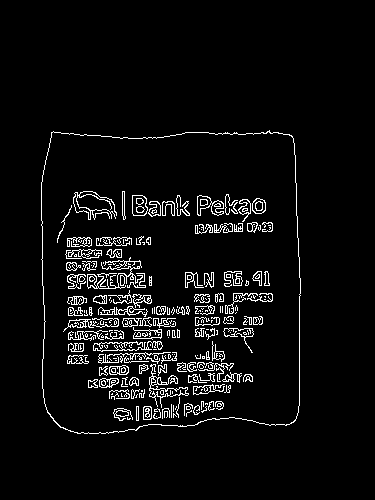

In [22]:
cv2_imshow(edges)

Rozmycie Gaussian Blur

In [23]:
gray_image = cv2.GaussianBlur(gray_image,(5,5),0)

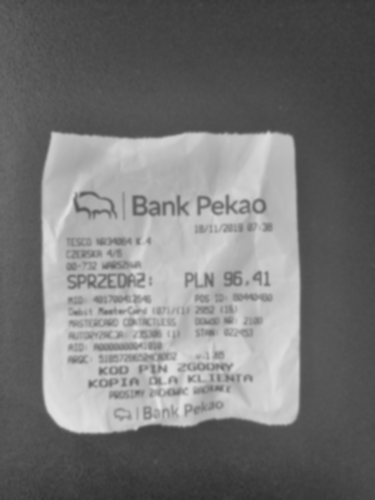

In [24]:
cv2_imshow(gray_image)

Detekcja krawędzi po rozmyciu

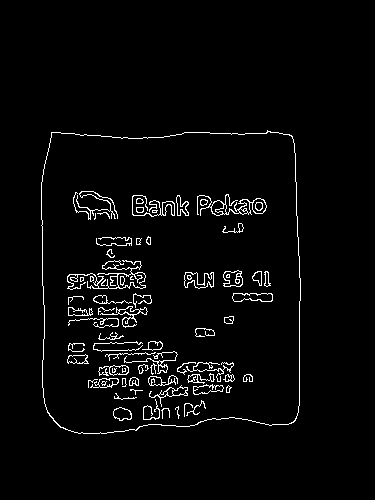

In [25]:
edges = cv2.Canny(gray_image,threshold1 = 75,threshold2 = 200)
cv2_imshow(edges)

### <a name='a7'></a> Znalezienie konturu dokumentu

Zadanie sprowadza się do wykrycia wierzchołków dokumentu. Zakładamy, że dokument stanowi główny obszar zdjęcia lub jest dobrze widoczny (tak jak pokazano na przykładzie, wsztstkie cztery wierzchołki dokumentu należą do zdjęcia). 

Naiwnie założymy, że najdłuższy kontur wykryty na zdjęciu to właśnie kontur szukanego dokumentu.

In [27]:
contours = cv2.findContours(image=edges.copy(), mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)#sparsowanie konturów
print(f'Liczba wszystkich wyszukanych punktów (kontur): {len(contours)}')
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

for contour in contours:
    print(len(contour))

Liczba wszystkich wyszukanych punktów (kontur): 135
217
215
189
356
83


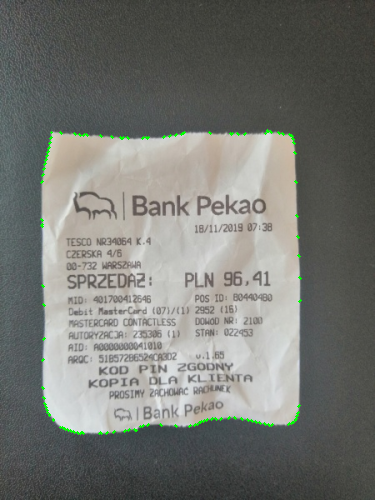

In [28]:
cnt1 = cv2.drawContours(image.copy(), contours[0], -1, (0, 255, 0), 2)
cv2_imshow(cnt1)

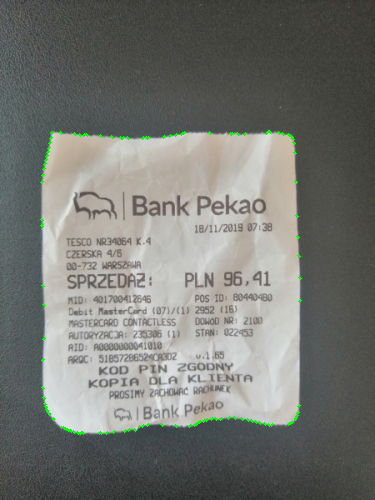

In [30]:
cnt2 = cv2.drawContours(image.copy(), contours[1], -1, (0, 255, 0), 2)
cv2_imshow(cnt2)

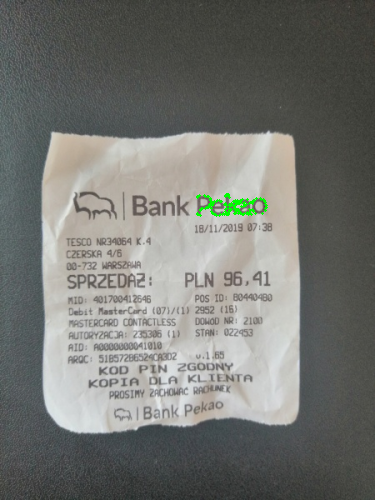

In [33]:
cnt3 = cv2.drawContours(image.copy(), contours[2], -1, (0, 255, 0), 2)
cv2_imshow(cnt3)

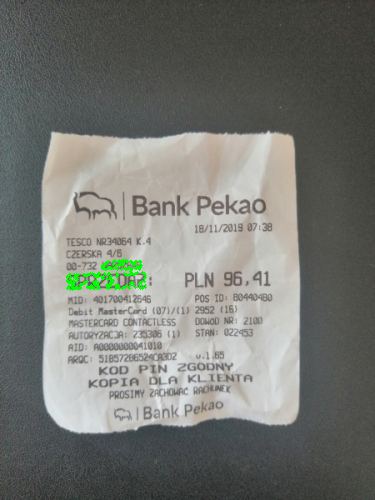

In [34]:
cnt4 = cv2.drawContours(image.copy(), contours[3], -1, (0, 255, 0), 2)
cv2_imshow(cnt4)

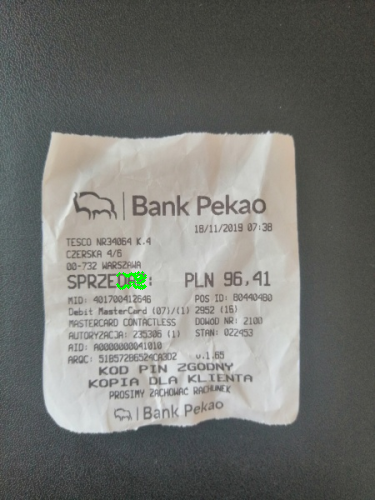

In [35]:
cnt5 = cv2.drawContours(image.copy(), contours[4], -1, (0, 255, 0), 2)
cv2_imshow(cnt5)